In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/kaggle/input/us-accidents/US_Accidents_March23.csv')

In [4]:
data.isnull().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [5]:
data.fillna(0,inplace=True)

In [6]:
data.isnull().sum()

ID                       0
Source                   0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
Description              0
Street                   0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
S

In [7]:
print("Number of columns: ",len(data.columns))
print("Number of rows: ",len(data))

Number of columns:  46
Number of rows:  7728394


In [9]:
data.head(10)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.0,0.0,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.0,0.0,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.0,0.0,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.0,0.0,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.0,0.0,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day
5,A-6,Source2,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,0.0,0.0,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
6,A-7,Source2,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,0.0,0.0,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
7,A-8,Source2,3,2016-02-08 07:59:58,2016-02-08 08:29:58,39.770382,-84.194901,0.0,0.0,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
8,A-9,Source2,2,2016-02-08 08:00:40,2016-02-08 08:30:40,39.778061,-84.172005,0.0,0.0,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
9,A-10,Source2,3,2016-02-08 08:10:04,2016-02-08 08:40:04,40.100590,-82.925194,0.0,0.0,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day


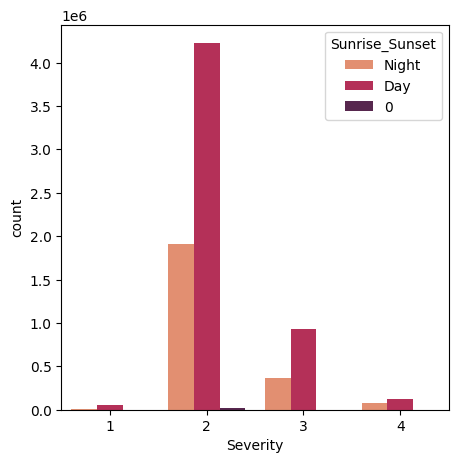

In [10]:
plt.figure(figsize=(5,5))
sns.countplot(x='Severity', data=data, hue='Sunrise_Sunset', palette='rocket_r')
plt.show()

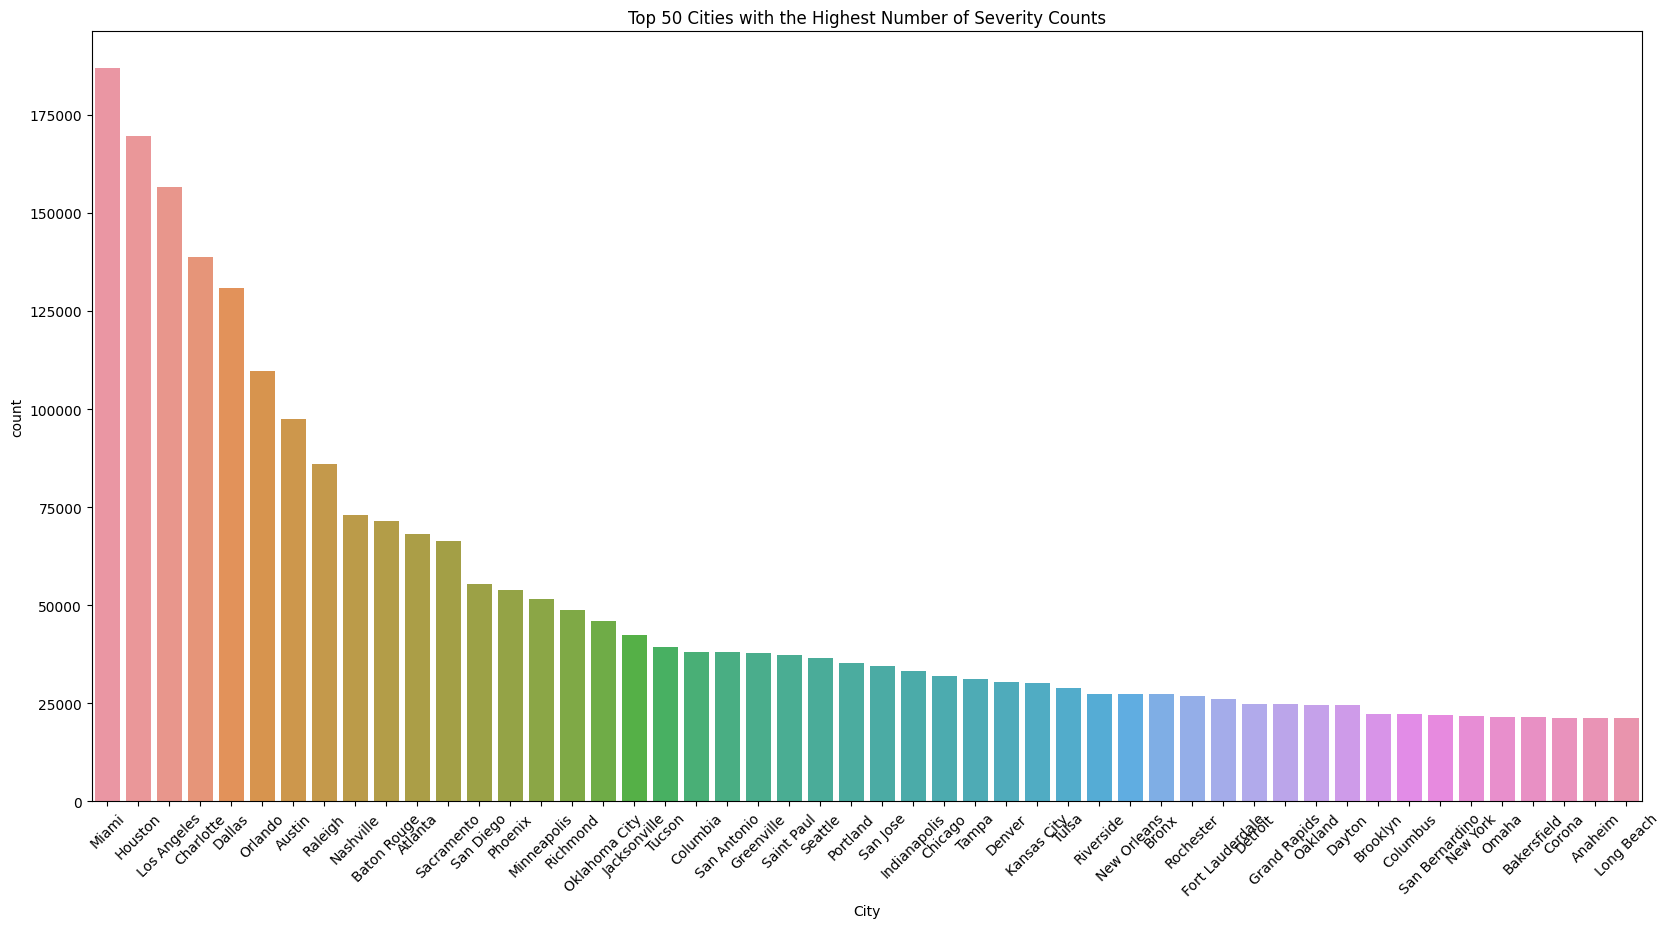

In [13]:
severity_counts = data.groupby(['City', 'Severity']).size().reset_index(name='Counts')

total_severity_counts = severity_counts.groupby('City')['Counts'].sum().reset_index()

top_50_cities = total_severity_counts.nlargest(50, 'Counts')

top_50_cities_severity = severity_counts[severity_counts['City'].isin(top_50_cities['City'])]

ordered_cities = top_50_cities.sort_values(by='Counts', ascending=False)['City']

plt.figure(figsize=(20, 10))
sns.countplot(data=data[data['City'].isin(ordered_cities)], x='City', order=ordered_cities)
plt.title('Top 50 Cities with the Highest Number of Severity Counts')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

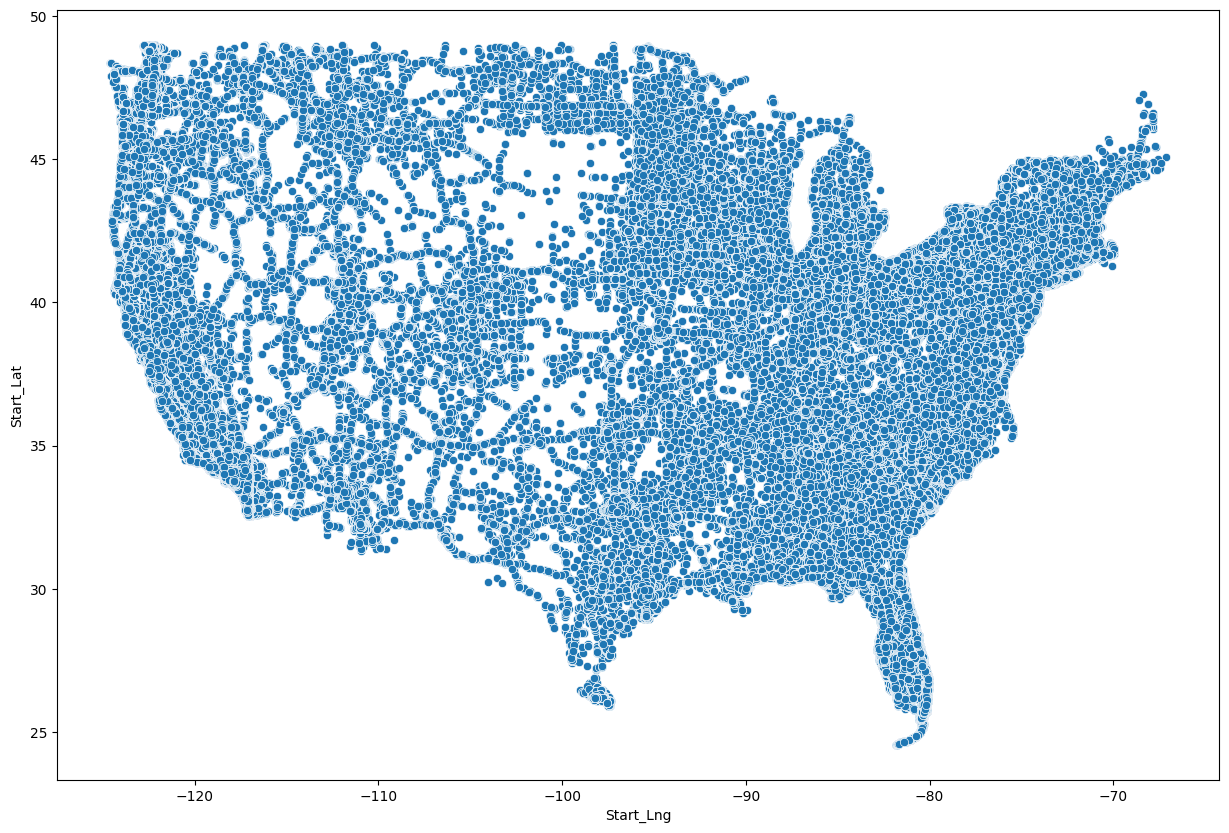

In [14]:
plt.figure(figsize=(15,10))
sns.scatterplot(y=data.Start_Lat, x=data.Start_Lng)

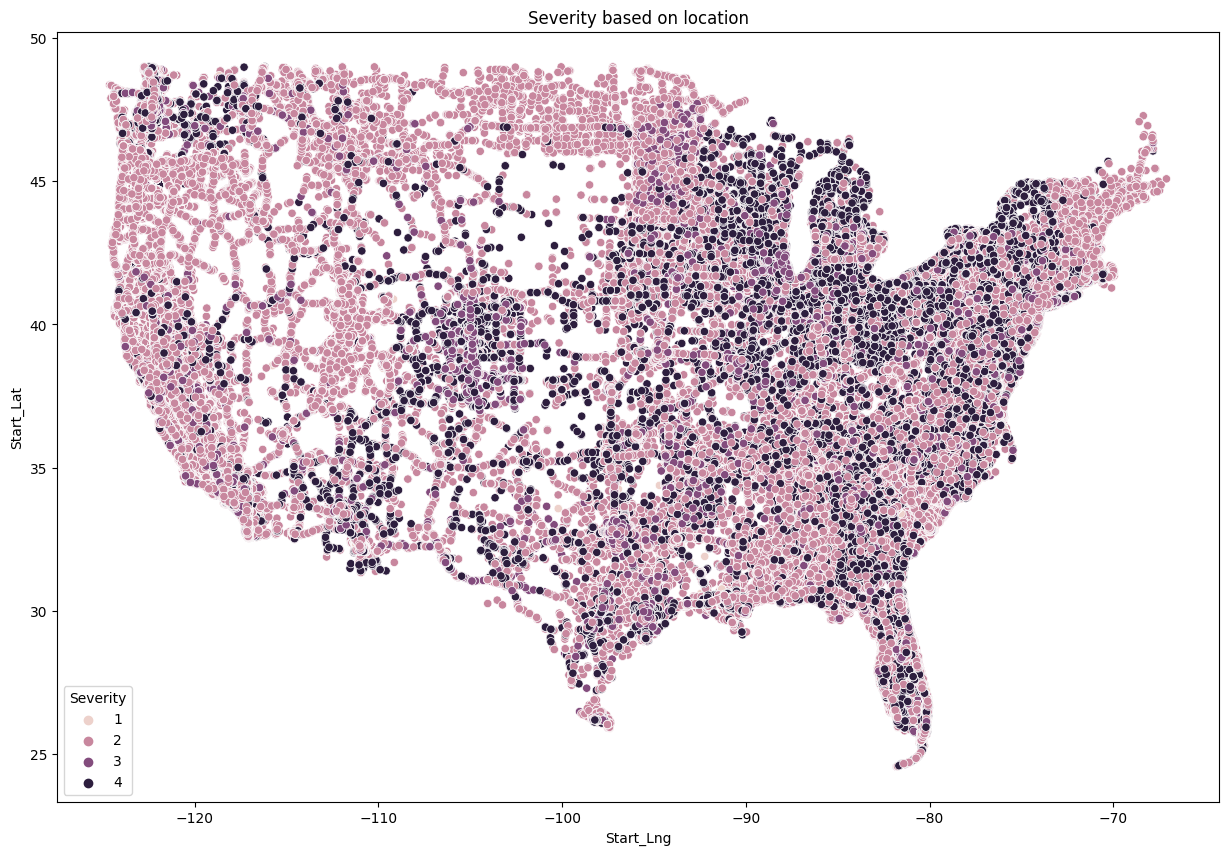

In [15]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=data, x='Start_Lng', y='Start_Lat', hue='Severity')
plt.title('Severity based on location')
plt.show()

In [17]:
weather=data['Weather_Condition'].value_counts()
weather

Weather_Condition
Fair                           2560802
Mostly Cloudy                  1016195
Cloudy                          817082
Clear                           808743
Partly Cloudy                   698972
                                ...   
Sand / Windy                         1
Heavy Rain Shower / Windy            1
Blowing Snow Nearby                  1
Heavy Freezing Rain / Windy          1
Drifting Snow                        1
Name: count, Length: 145, dtype: int64

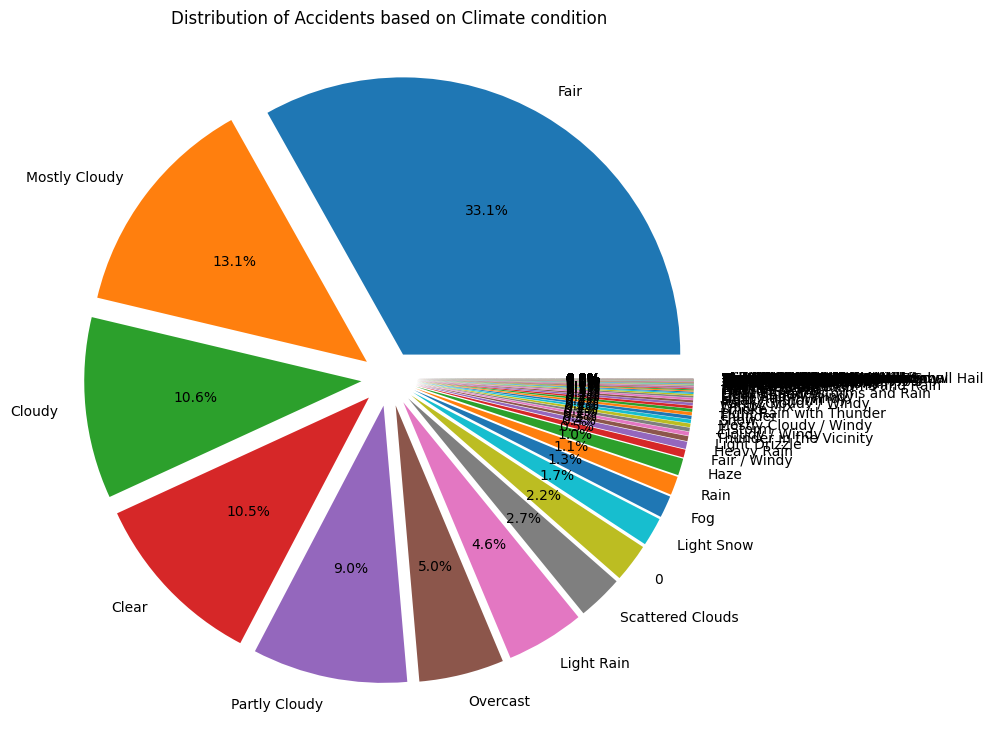

In [18]:
plt.figure(figsize=(9,9))
plt.title('Distribution of Accidents based on Climate condition')
label = weather.keys()
ex=[0.1]*len(weather)
plt.pie(weather, autopct='%.1f%%', labels=label, explode=ex)
plt.show()

In [19]:
data['Sunrise_Sunset'].unique()

array(['Night', 'Day', 0], dtype=object)

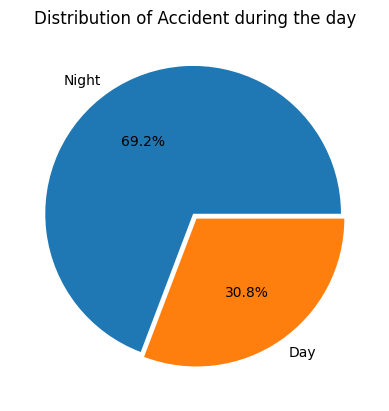

In [21]:
plt.title('Distribution of Accident during the day')
data.drop(data[data['Sunrise_Sunset']==0].index, inplace=True)
plt.pie(data['Sunrise_Sunset'].value_counts(), autopct='%.1f%%', explode=[0.02,0.02], labels=['Night', 'Day'])
plt.show()

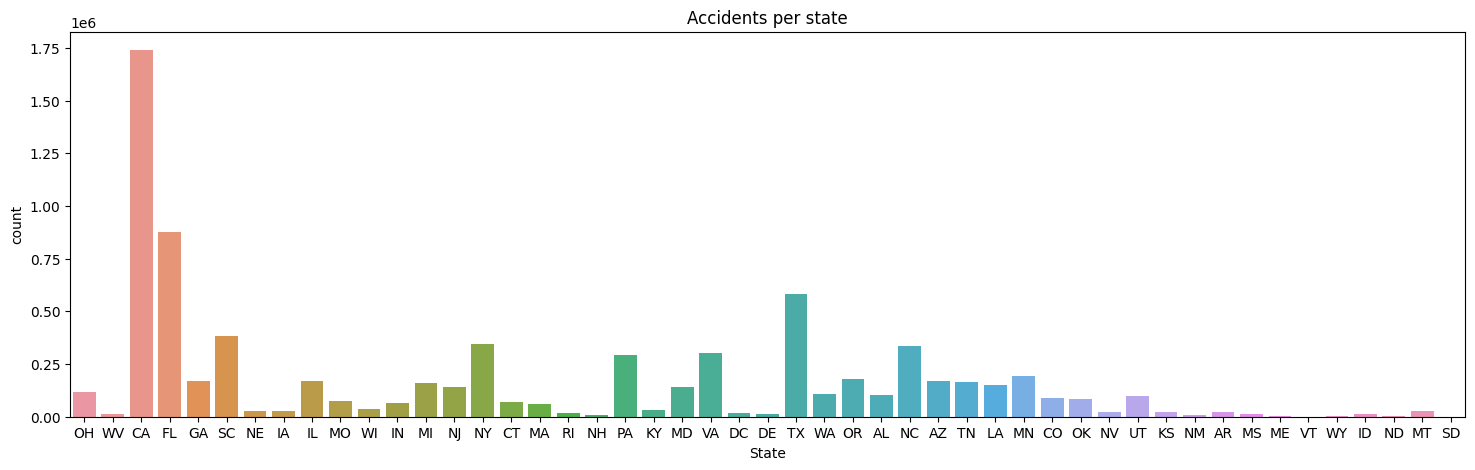

In [22]:
plt.figure(figsize=(18,5))
plt.title('Accidents per state')
sns.countplot(x='State', data=data)
plt.show()

In [24]:
data['Start_Time'] = pd.to_datetime(data['Start_Time'], format='mixed')
data['End_Time'] = pd.to_datetime(data['End_Time'], format='mixed')
data['Resolution_Time'] = (data['End_Time'] - data['Start_Time'])/pd.Timedelta(hours=1)
data['Resolution_Time']

0          5.233333
1          0.500000
2          0.500000
3          0.500000
4          0.500000
             ...   
7728389    0.476667
7728390    0.448056
7728391    0.474444
7728392    0.489167
7728393    0.490278
Name: Resolution_Time, Length: 7705148, dtype: float64

In [25]:
resolution_time_severity= data.groupby('Severity')['Resolution_Time'].mean()
resolution_time_severity

Severity
1     0.896726
2     7.938548
3     1.247055
4    27.534859
Name: Resolution_Time, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


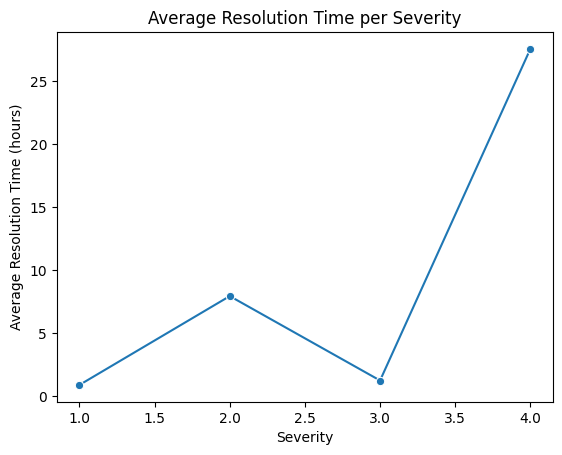

In [26]:
sns.lineplot(resolution_time_severity, marker='o')
plt.title('Average Resolution Time per Severity')
plt.xlabel('Severity')
plt.ylabel('Average Resolution Time (hours)')
plt.show()

Text(0.5, 1.0, 'Severity based on Traffic_Calming')

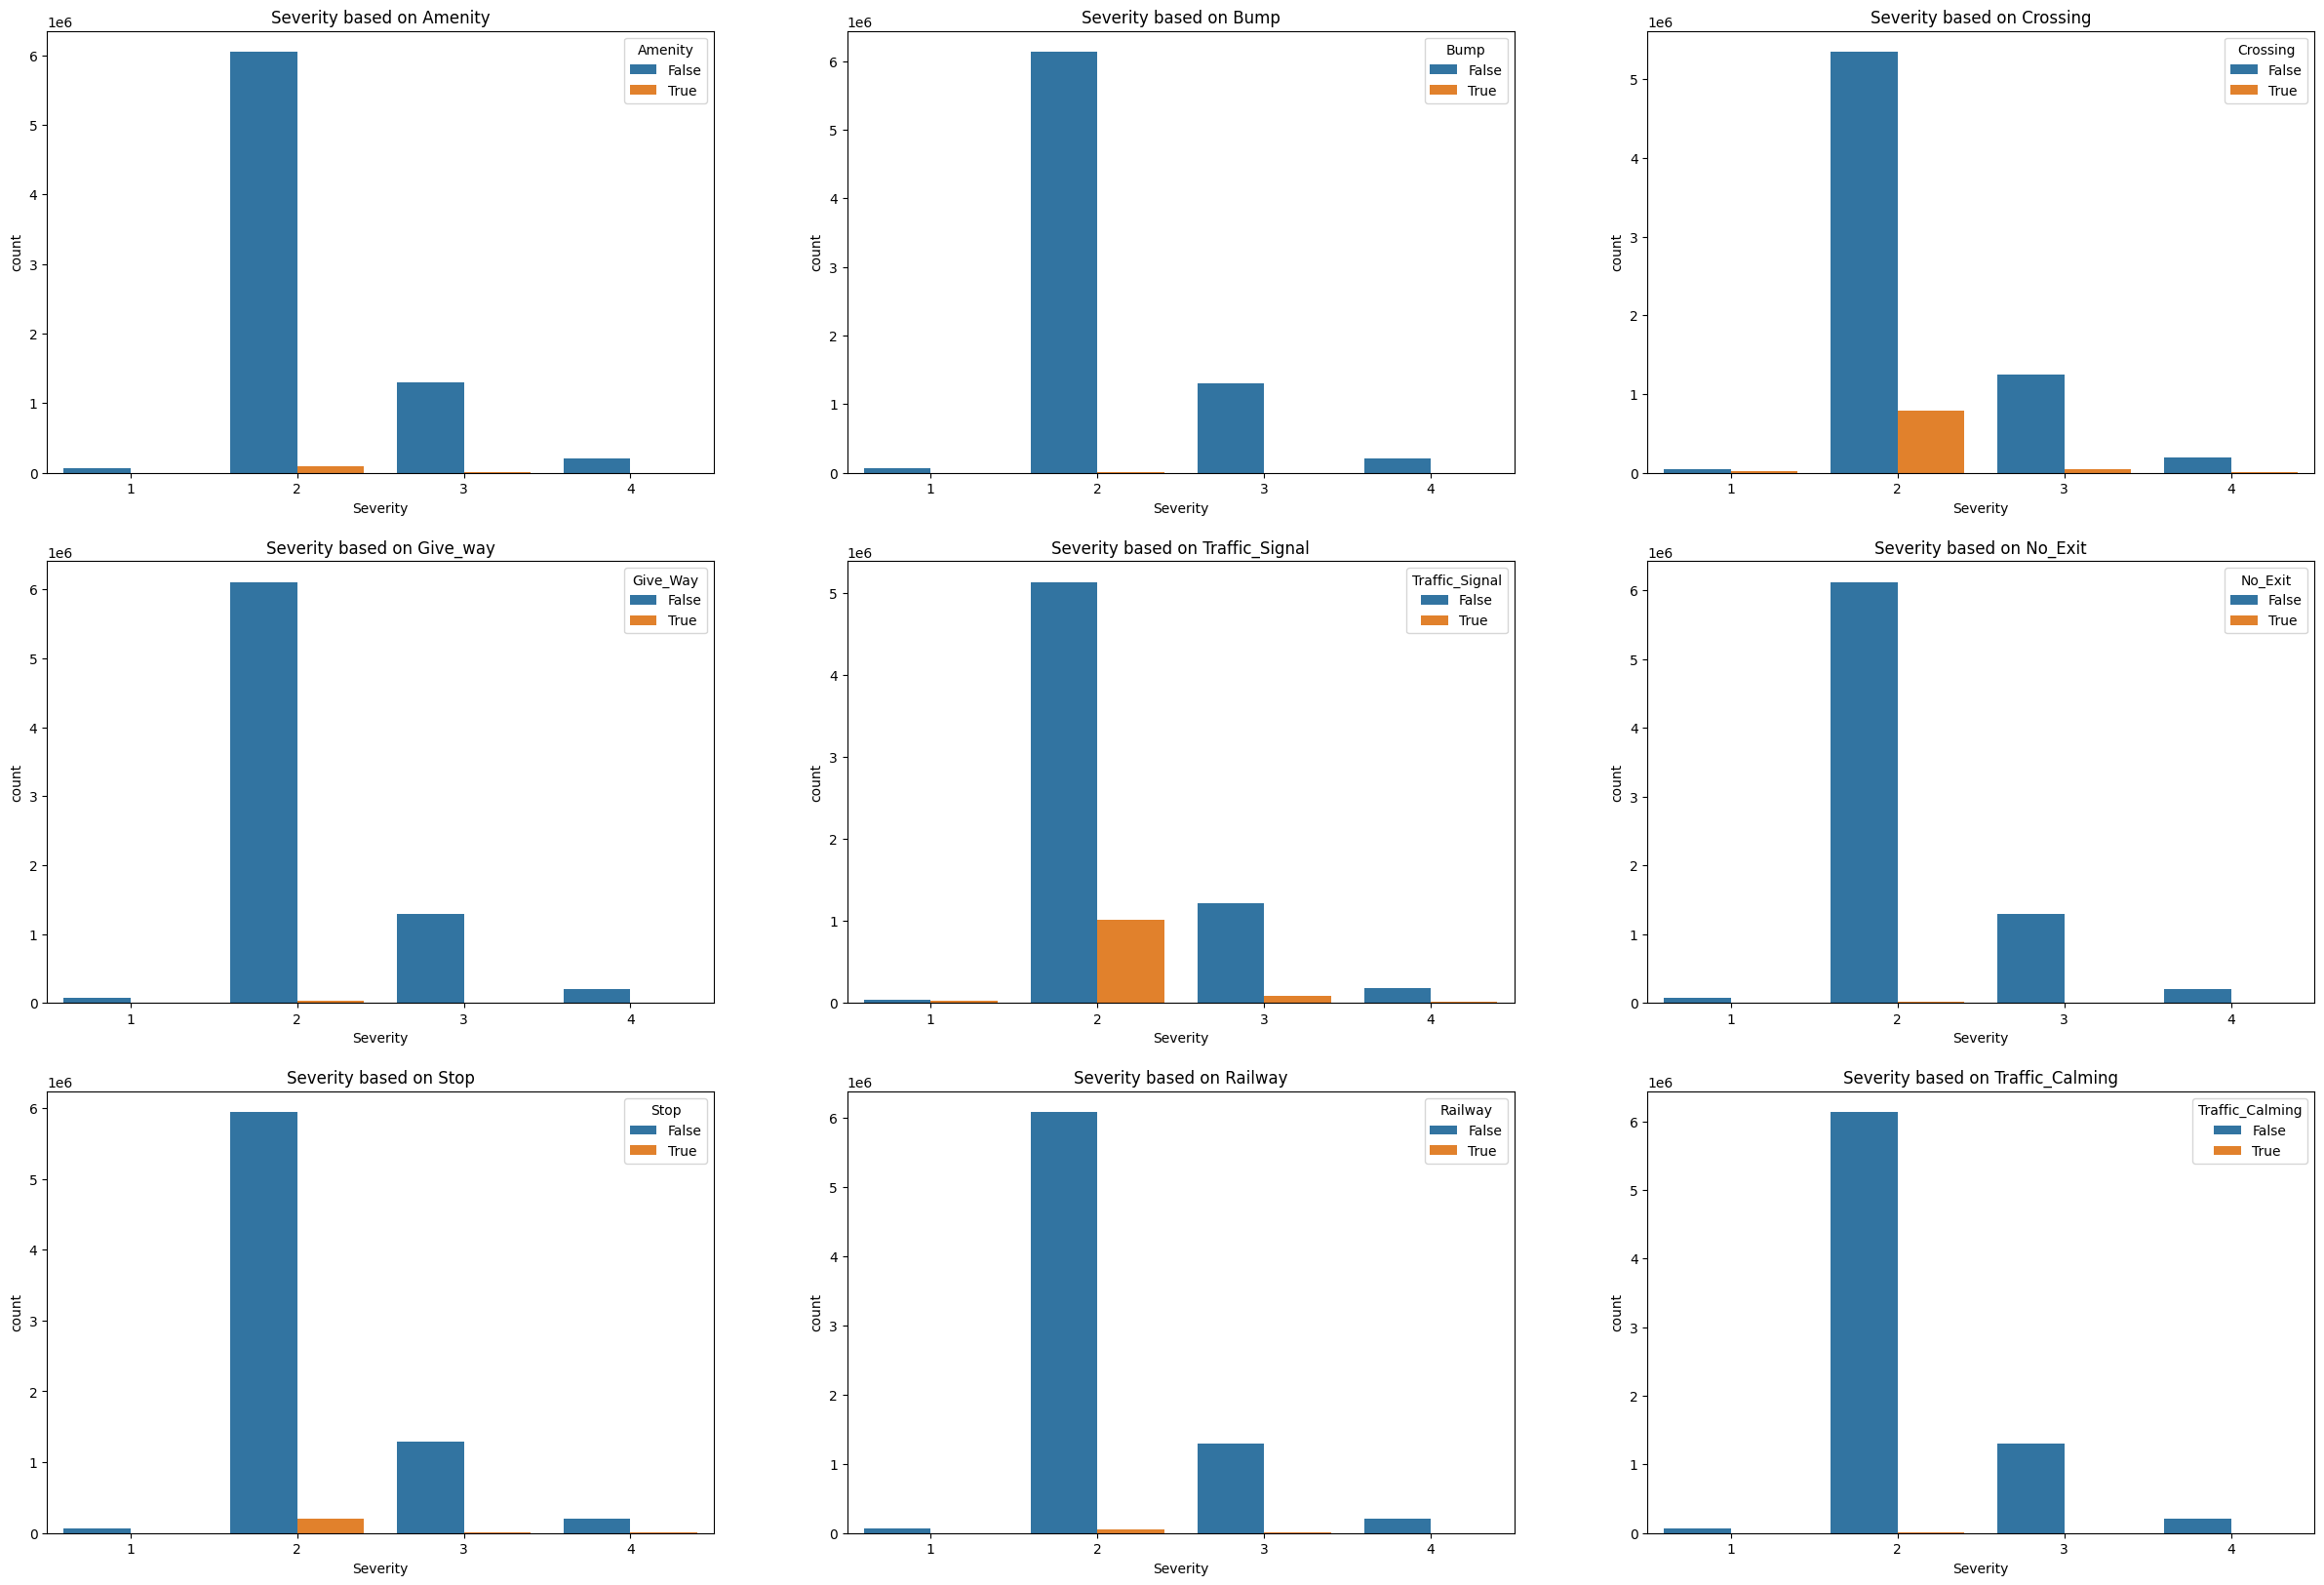

In [30]:
plt.figure(figsize=(30,20))
plt.subplot(3,3,1)
sns.countplot(x='Severity', data=data, hue='Amenity')
plt.title('Severity based on Amenity')
plt.subplot(3,3,2)
sns.countplot(x='Severity', data=data, hue='Bump')
plt.title('Severity based on Bump')
plt.subplot(3,3,3)
sns.countplot(x='Severity', data=data, hue='Crossing')
plt.title('Severity based on Crossing')
plt.subplot(3,3,4)
sns.countplot(x='Severity', data=data, hue='Give_Way')
plt.title('Severity based on Give_way')
plt.subplot(3,3,5)
sns.countplot(x='Severity', data=data, hue='Traffic_Signal')
plt.title('Severity based on Traffic_Signal')
plt.subplot(3,3,6)
sns.countplot(x='Severity', data=data, hue='No_Exit')
plt.title('Severity based on No_Exit')
plt.subplot(3,3,7)
sns.countplot(x='Severity', data=data, hue='Stop')
plt.title('Severity based on Stop')
plt.subplot(3,3,8)
sns.countplot(x='Severity', data=data, hue='Railway')
plt.title('Severity based on Railway')
plt.subplot(3,3,9)
sns.countplot(x='Severity', data=data, hue='Traffic_Calming')
plt.title('Severity based on Traffic_Calming')

In [31]:
year=data['Start_Time'].dt.year

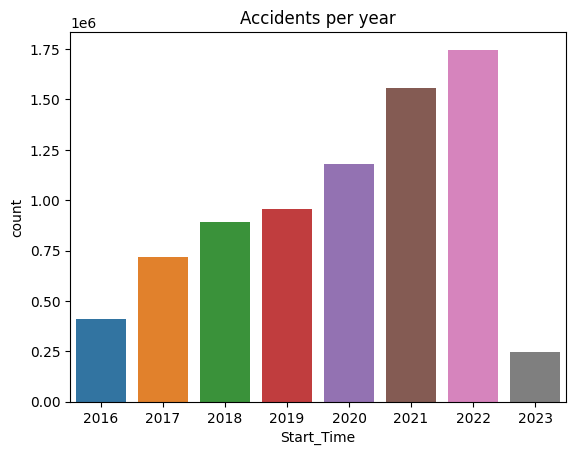

In [32]:
sns.countplot(x=year, data=data)
plt.title('Accidents per year')
plt.show()

In [33]:
top_50_cities = data['City'].value_counts().head(50)
top_50_cities

City
Miami              186916
Houston            169604
Los Angeles        156491
Charlotte          138652
Dallas             130939
Orlando            109733
Austin              97359
Raleigh             86079
Nashville           72930
Baton Rouge         71588
Atlanta             68184
Sacramento          66264
San Diego           55504
Phoenix             53974
Minneapolis         51488
Richmond            48845
Oklahoma City       46092
Jacksonville        42447
Tucson              39304
Columbia            38176
San Antonio         37961
Greenville          37802
Saint Paul          37383
Seattle             36564
Portland            35383
San Jose            34536
Indianapolis        33219
Chicago             32035
Tampa               31193
Denver              30557
Kansas City         30107
Tulsa               28880
Riverside           27403
New Orleans         27354
Bronx               27297
Rochester           26865
Fort Lauderdale     26205
Detroit             24863
Grand R

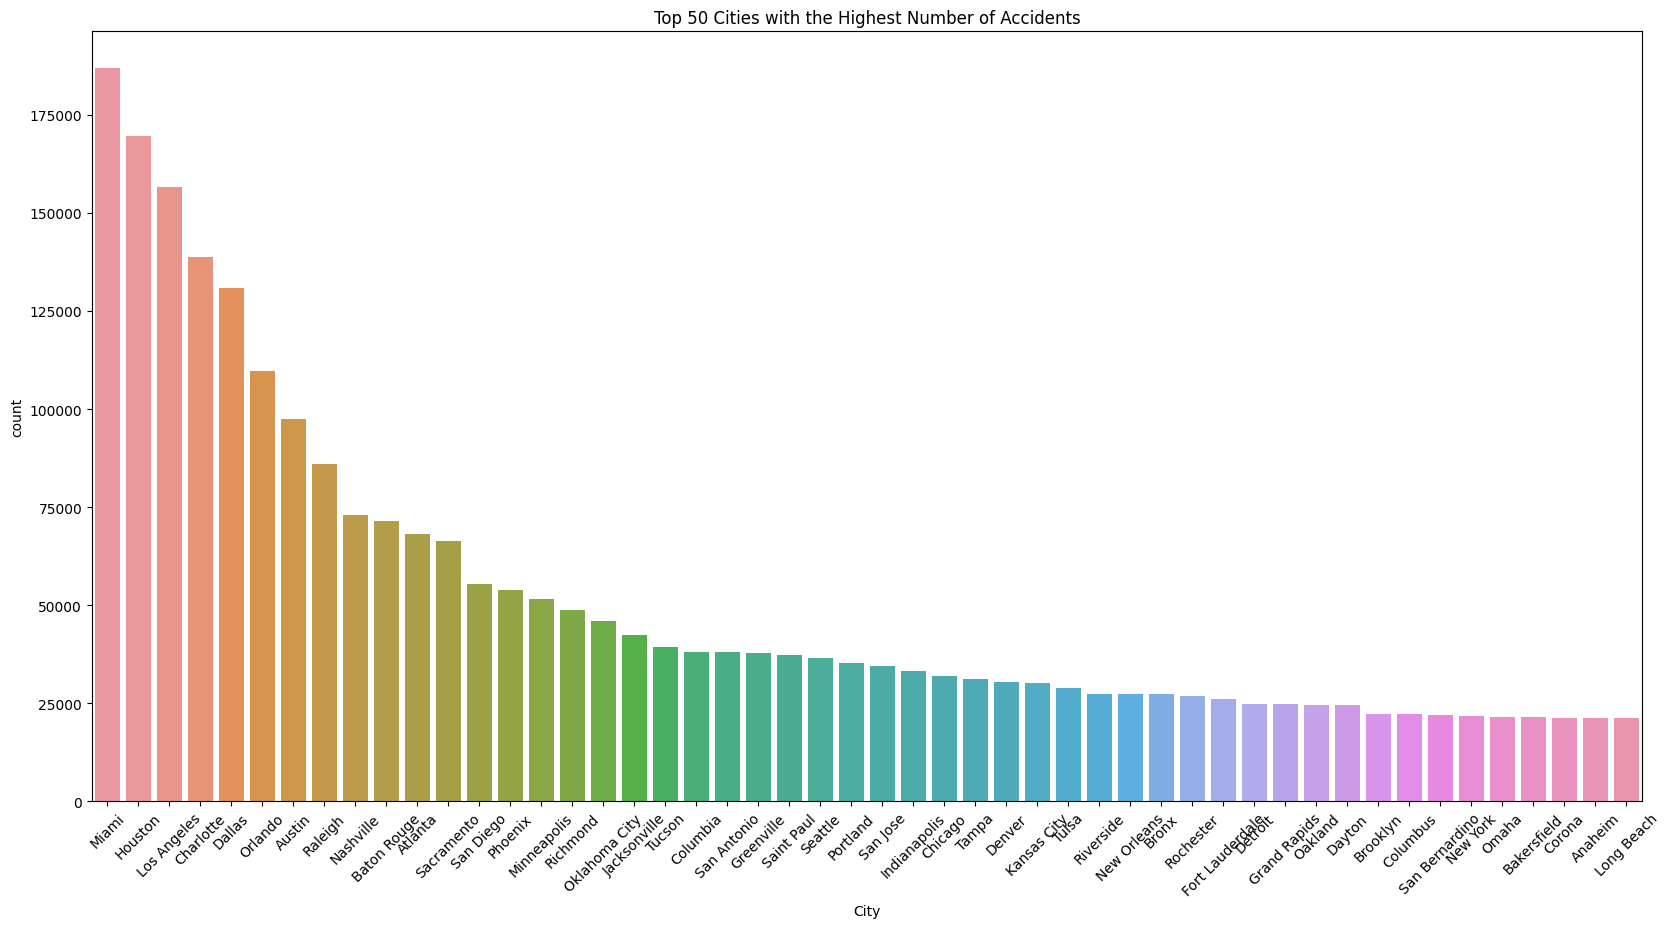

In [34]:
plt.figure(figsize=(20, 10))
sns.countplot(x='City', data=data, order=top_50_cities.index)
plt.title('Top 50 Cities with the Highest Number of Accidents')
plt.xticks(rotation=45)
plt.show()

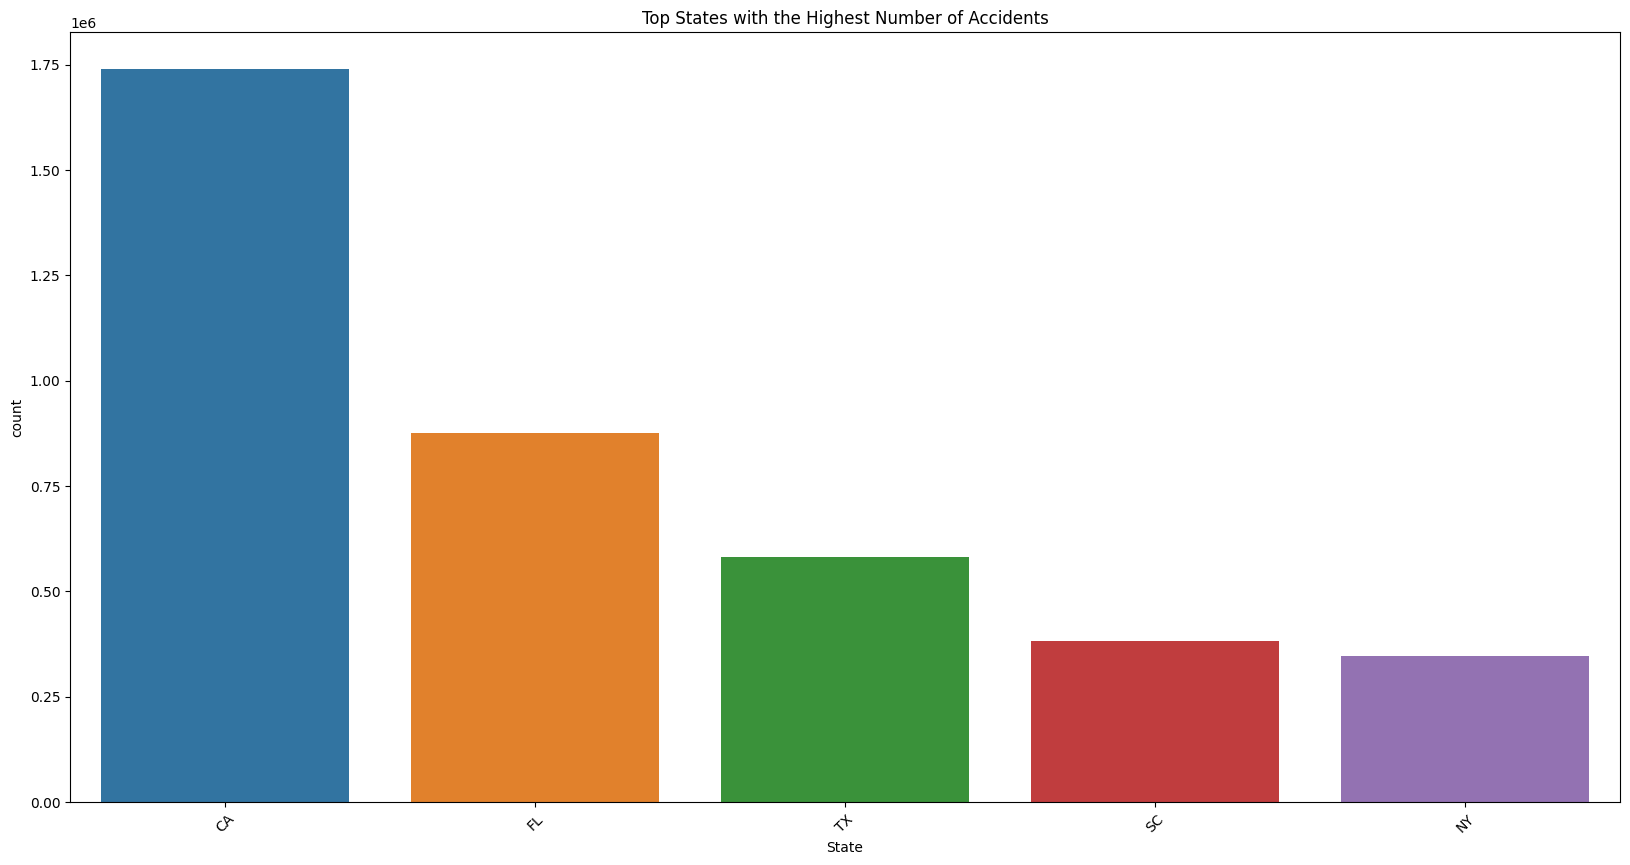

In [37]:
top_50_states = data['State'].value_counts().head()
top_50_states

plt.figure(figsize=(20, 10))
sns.countplot(x='State', data=data, order=top_50_states.index)
plt.title('Top States with the Highest Number of Accidents')
plt.xticks(rotation=45)
plt.show()

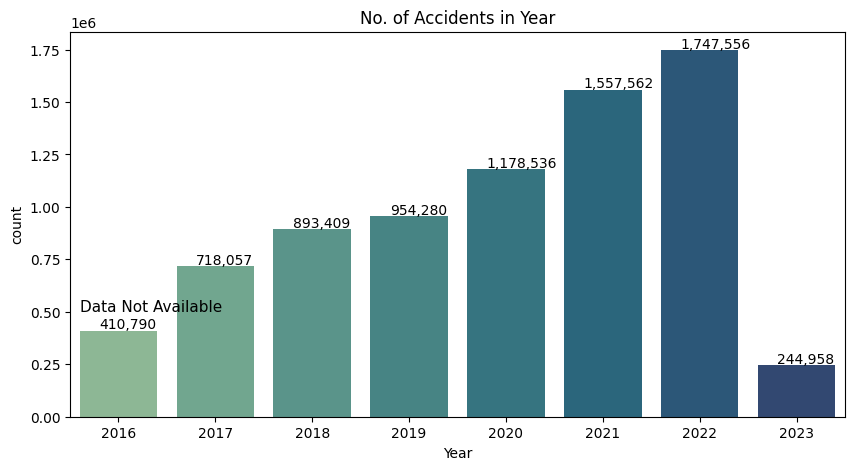

In [39]:
data.Start_Time = pd.to_datetime(data.Start_Time)
data.Start_Time[0]


data['Month'] = data['Start_Time'].dt.month
data['Year'] = data['Start_Time'].dt.year
data['Hour'] = data['Start_Time'].dt.hour
data['Weekday'] = data['Start_Time'].dt.weekday
#yearly data subset
data_2016 = data[data.Start_Time.dt.year == 2016]
data_2017 = data[data.Start_Time.dt.year == 2017]
data_2018 = data[data.Start_Time.dt.year == 2018]
data_2019 = data[data.Start_Time.dt.year == 2019]
data_2020 = data[data.Start_Time.dt.year == 2020]
data_2017_2019 = data[(data["Year"] >= 2017) & (data["Year"] <= 2019)]
fig, ax = plt.subplots(figsize = (10,5))
c = sns.countplot(x="Year", data=data, orient = 'v', palette = "crest")
plt.annotate('Data Not Available',xy=(-0.4,500000), fontsize=11)
c.set_title("No. of Accidents in Year")
for i in ax.patches:
    count = '{:,.0f}'.format(i.get_height())
    x = i.get_x()+i.get_width()-0.60
    y = i.get_height()+10000
    ax.annotate(count, (x, y))
plt.show()